# LOTTO EXPLORATORY DATA ANALYSIS
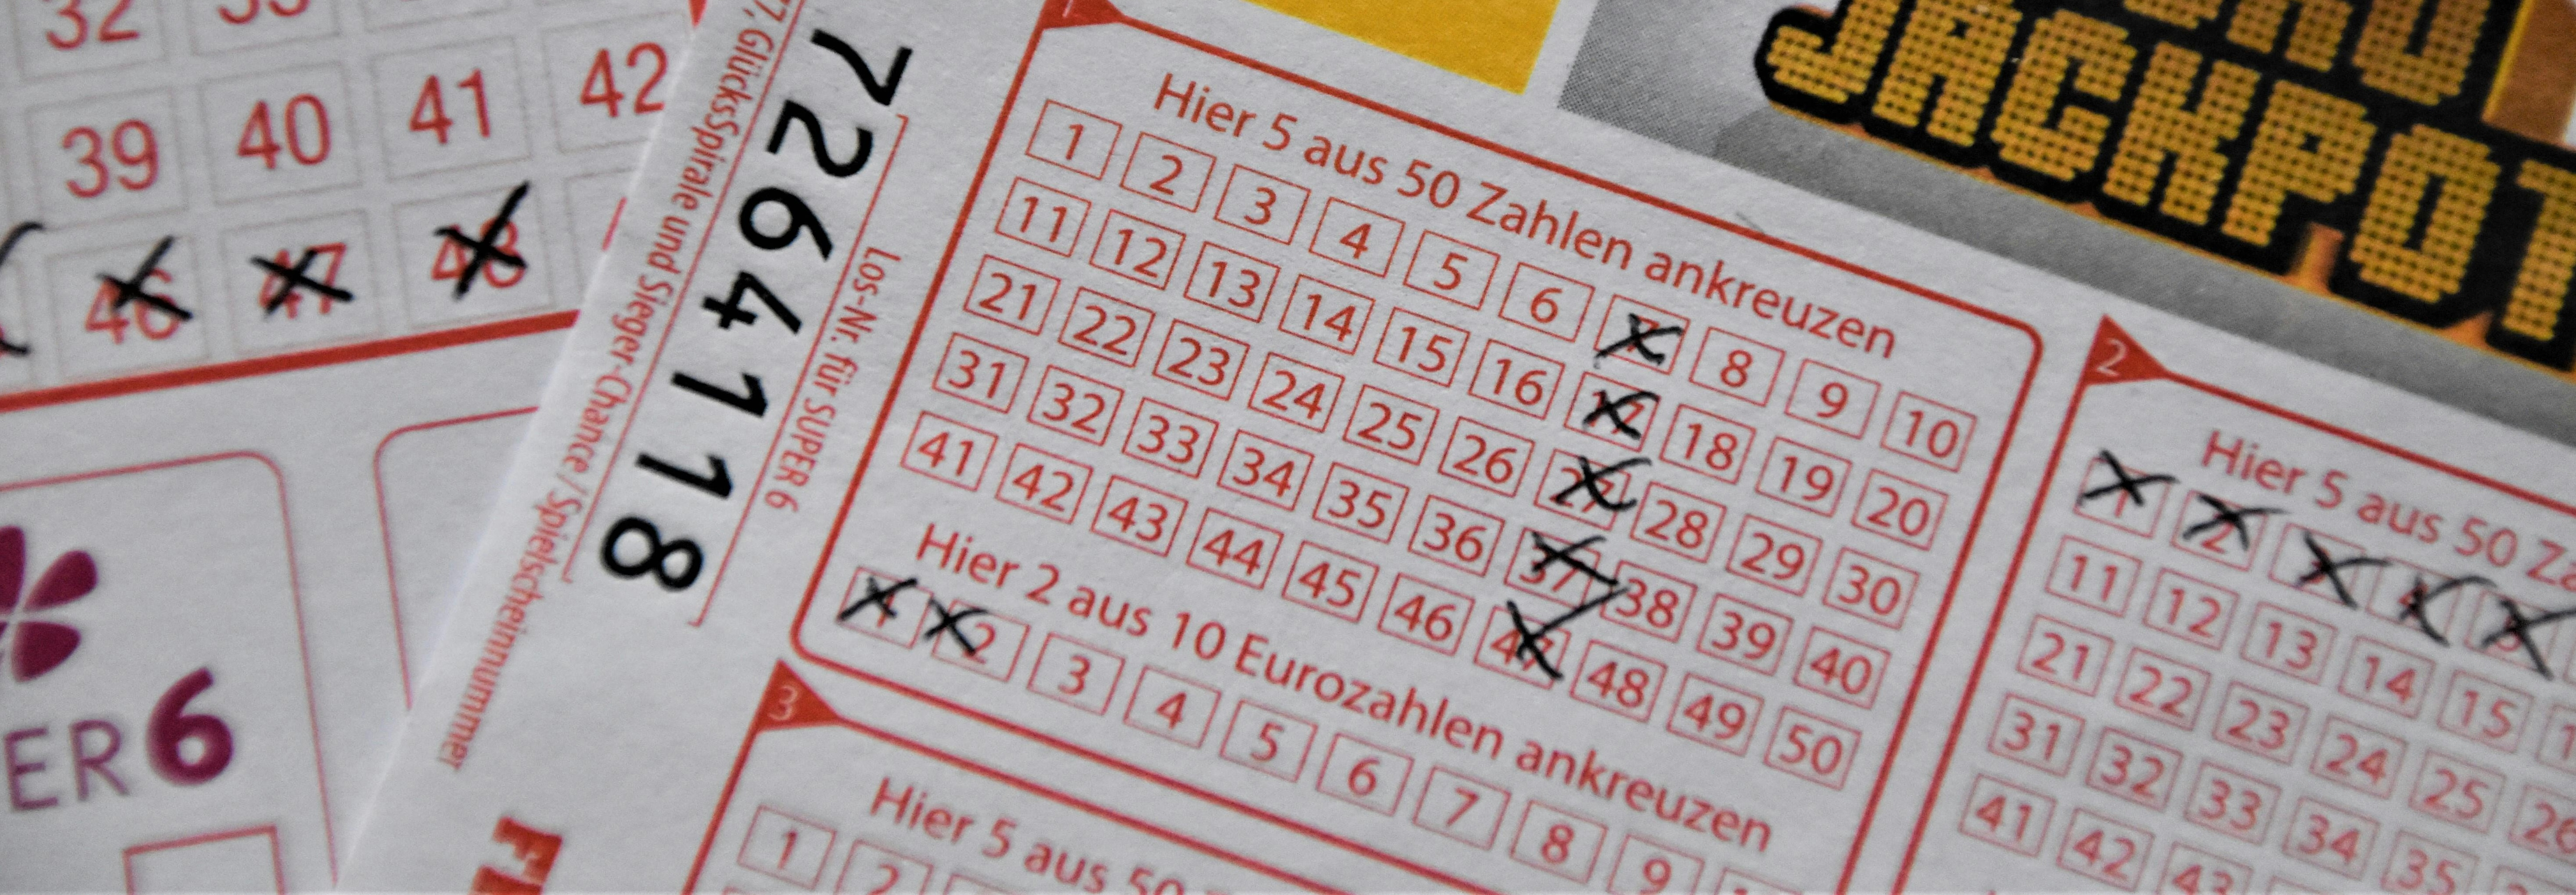

### In this section, the acquired winning combinations from January 1, 2015 to present will be analyzed:
The original exercise in Udemy's day 99 is Space Race but I am not really into that so I decided to improvise. <br>
***(Disclaimer: I am not a g4mbler nor promote it but I think it's fun to investigate games related to probability.)*** <br>
So, using the data scraped from the website of Lotto's holding office in my country, I aim to get some insights on where the Filipino beer money goes. 

This exercise will use mostly use `pandas` for exploratory data analysis and `matplotlib` to present the results.<br>
Here are some preliminary steps (data cleaning):
- ✅ Check for non-null columns
- ✅ Drop unnecessary columns
- ✅ Ensure all columns are in the correct datatype

### At the end on the analysis, the following findings should be presented:
*Note: All of this are analyzed in per game - total & per year*
- Aggregates of winning *(average, min, max, etc.)*
- Winning percentage from 2015 to present in every game *(# games with winners / # of games)*
- Frequently appearing numbers per game *(where applicable: solo, pair, trio,...etc. )*


💡 Just an idea... for Day 100 (Prediction? Hmmmm....🤔)


In [98]:
from ast import literal_eval
from datetime import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', '{:,.2f}'.format)

In [99]:
# preview lotto dataframe
lotto_df = pd.read_csv("lotto_data.csv")
lotto_df.head()

Unnamed: 0        LOTTO GAME       COMBINATIONS  DRAW DATE  JACKPOT (PHP)  \
0           0  Grand Lotto 6/55  07-45-32-42-06-28  8/16/2025  76,085,171.80   
1           1        Lotto 6/42  13-08-29-03-41-36  8/16/2025  35,318,748.60   
2           2          6D Lotto        2-5-6-8-9-3  8/16/2025   1,396,324.00   
3           3      3D Lotto 2PM              6-0-1  8/16/2025       4,500.00   
4           4      3D Lotto 5PM              9-5-7  8/16/2025       4,500.00   

   WINNERS  
0        0  
1        0  
2        1  
3      381  
4      159

In [100]:
# drop Unnamed: 0 column
lotto_df = lotto_df.drop('Unnamed: 0', axis=1)
lotto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32917 entries, 0 to 32916
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LOTTO GAME     32917 non-null  object
 1   COMBINATIONS   32917 non-null  object
 2   DRAW DATE      32917 non-null  object
 3   JACKPOT (PHP)  32917 non-null  object
 4   WINNERS        32917 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.3+ MB


In [101]:
# 3D Lotto, 2D Lotto, and Suertres Lotto were listed including their timeslot
# For simplicity, they can just be merged as one, like the rest of Lotto Games
print("old games: ", lotto_df["LOTTO GAME"].unique(),'\n')

replace_dict = {"2D Lotto": ['2D Lotto 2PM', '2D Lotto 5PM', '2D Lotto 9PM'],
                "3D Lotto": ['3D Lotto 2PM', '3D Lotto 5PM', '3D Lotto 9PM'],
                "Suertres Lotto": ['Suertres Lotto 11:30AM', 'Suertres Lotto 12:30PM', 'Suertres Lotto 2PM'],
                "EZ2 Lotto": ['EZ2 Lotto 11:30AM', 'EZ2 Lotto 12:30PM', 'EZ2 Lotto 2PM']            
               }

for k, v in replace_dict.items():
    lotto_df["LOTTO GAME"] = lotto_df["LOTTO GAME"].replace(v, k)

print("updated games: ", lotto_df["LOTTO GAME"].unique(), '\n')
print("number of lotto games: ", lotto_df["LOTTO GAME"].nunique())

old games:  ['Grand Lotto 6/55' 'Lotto 6/42' '6D Lotto' '3D Lotto 2PM' '3D Lotto 5PM'
 '3D Lotto 9PM' '2D Lotto 2PM' '2D Lotto 5PM' '2D Lotto 9PM'
 'Ultra Lotto 6/58' 'Megalotto 6/45' '4D Lotto' 'Superlotto 6/49'
 'Suertres Lotto 11:30AM' 'Suertres Lotto 12:30PM' 'Suertres Lotto 2PM'
 'EZ2 Lotto 2PM' 'EZ2 Lotto 11:30AM' 'EZ2 Lotto 12:30PM'] 

updated games:  ['Grand Lotto 6/55' 'Lotto 6/42' '6D Lotto' '3D Lotto' '2D Lotto'
 'Ultra Lotto 6/58' 'Megalotto 6/45' '4D Lotto' 'Superlotto 6/49'
 'Suertres Lotto' 'EZ2 Lotto'] 

number of lotto games:  11


In [102]:
# convert 'DRAW DATE' column to datetime
lotto_df['DRAW DATE'] = pd.to_datetime(lotto_df['DRAW DATE'])

# convert 'JACKPOT (PHP)' column to float
lotto_df['JACKPOT (PHP)'] = lotto_df['JACKPOT (PHP)'].str.replace(",", "")
lotto_df['JACKPOT (PHP)'] = pd.to_numeric(lotto_df['JACKPOT (PHP)'])

for column in lotto_df.columns:
    print(f"Column {column} type: ", lotto_df[column].dtype)

Column LOTTO GAME type:  object
Column COMBINATIONS type:  object
Column DRAW DATE type:  datetime64[ns]
Column JACKPOT (PHP) type:  float64
Column WINNERS type:  int64


In [103]:
lotto_df["COMBINATIONS"] = lotto_df["COMBINATIONS"].str.split('-')
lotto_df.head()

LOTTO GAME              COMBINATIONS  DRAW DATE  JACKPOT (PHP)  \
0  Grand Lotto 6/55  [07, 45, 32, 42, 06, 28] 2025-08-16  76,085,171.80   
1        Lotto 6/42  [13, 08, 29, 03, 41, 36] 2025-08-16  35,318,748.60   
2          6D Lotto        [2, 5, 6, 8, 9, 3] 2025-08-16   1,396,324.00   
3          3D Lotto                 [6, 0, 1] 2025-08-16       4,500.00   
4          3D Lotto                 [9, 5, 7] 2025-08-16       4,500.00   

   WINNERS  
0        0  
1        0  
2        1  
3      381  
4      159

In [104]:
lotto_df.tail()

LOTTO GAME COMBINATIONS  DRAW DATE  JACKPOT (PHP)  WINNERS
32912   3D Lotto    [2, 2, 9] 2015-01-02       4,500.00      781
32913   3D Lotto    [6, 3, 0] 2015-01-02       4,500.00      762
32914   2D Lotto     [11, 31] 2015-01-02       4,000.00      597
32915   2D Lotto     [01, 15] 2015-01-02       4,000.00      459
32916   2D Lotto     [22, 21] 2015-01-02       4,000.00       30

### Winner subset for All Lotto Games

In [105]:
# subset lotto games with winners
lotto_won_df = lotto_df[lotto_df["WINNERS"]!= 0]
lotto_won_df.head()

LOTTO GAME        COMBINATIONS  DRAW DATE  JACKPOT (PHP)  WINNERS
2   6D Lotto  [2, 5, 6, 8, 9, 3] 2025-08-16   1,396,324.00        1
3   3D Lotto           [6, 0, 1] 2025-08-16       4,500.00      381
4   3D Lotto           [9, 5, 7] 2025-08-16       4,500.00      159
5   3D Lotto           [0, 3, 9] 2025-08-16       4,500.00      158
6   2D Lotto            [01, 07] 2025-08-16       4,000.00      414

In [106]:
number_of_winners = lotto_won_df.groupby("LOTTO GAME")[["WINNERS","JACKPOT (PHP)"]]\
                                .agg(total_winners=("WINNERS", "sum"),\
                                     total_wins_millions=("JACKPOT (PHP)", "sum"),\
                                     ave_wins=("JACKPOT (PHP)", "mean"))\
                                .sort_values("LOTTO GAME").reset_index()
number_of_winners["total_wins_millions"] = number_of_winners["total_wins_millions"] / 1000000
number_of_winners

LOTTO GAME  total_winners  total_wins_millions       ave_wins
0           2D Lotto        2968587                43.96       4,000.00
1           3D Lotto        4905846                49.47       4,500.00
2           4D Lotto          45213                66.62      43,945.77
3           6D Lotto            284               410.55   2,052,733.11
4          EZ2 Lotto            826                 0.02       4,000.00
5   Grand Lotto 6/55            509             7,560.74 108,010,608.10
6         Lotto 6/42            230             5,466.69  26,929,501.49
7     Megalotto 6/45            184             6,480.70  41,542,931.31
8     Suertres Lotto           3533                 0.03       4,500.00
9    Superlotto 6/49            113             7,030.11  68,922,642.89
10  Ultra Lotto 6/58             48             7,954.77 194,018,776.55

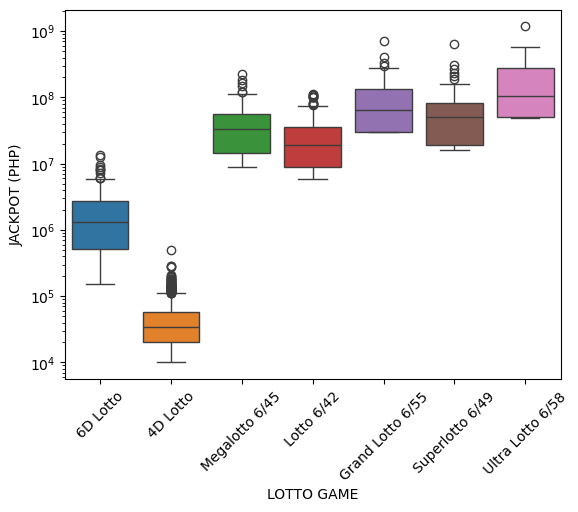

count           mean            std           min  \
LOTTO GAME                                                              
4D Lotto         1,516.00      43,945.77      35,572.73     10,000.00   
6D Lotto           200.00   2,052,733.11   2,201,028.83    150,000.00   
Grand Lotto 6/55    70.00 108,010,608.10 111,890,676.07 29,700,000.00   
Lotto 6/42         203.00  26,929,501.49  24,297,594.05  5,940,000.00   
Megalotto 6/45     156.00  41,542,931.31  36,307,679.83  8,910,000.00   
Superlotto 6/49    102.00  68,922,642.89  80,000,950.43 15,840,000.00   
Ultra Lotto 6/58    41.00 194,018,776.55 210,161,729.11 49,500,000.00   

                           25%            50%            75%              max  
LOTTO GAME                                                                     
4D Lotto             20,088.00      34,743.00      56,839.50       494,575.00  
6D Lotto            516,157.25   1,330,528.00   2,695,666.50    13,725,184.00  
Grand Lotto 6/55 30,000,000.00  63,937,866.00 135,006,294.20   698,806,269.20  
Lotto 6/42        8,821,660.80  18,836,826.00  35,358,765.20   111,998,556.00  
Megalotto 6/45   14,415,482.00  33,258,726.20  55,697,759.00   225,248,638.00  
Superlotto 6/49  19,093,953.65  50,182,926.20  83,622,195.50   640,654,817.60  
Ultra Lotto 6/58 50,000,000.00 103,439,627.60 277,977,308.00 1,180,622,508.00

In [107]:
# box plot of Big Prize Games (Mega, Grand, Super, Ultra)
big_prize = ["Ultra Lotto 6/58", "Grand Lotto 6/55", "Megalotto 6/45", "Superlotto 6/49", "Lotto 6/42", '4D Lotto', '6D Lotto']

sns.boxplot(data=lotto_won_df[lotto_won_df["LOTTO GAME"].isin(big_prize)], x="LOTTO GAME", y="JACKPOT (PHP)", hue='LOTTO GAME')
plt.yscale('log')
plt.xlabel("LOTTO GAME")
plt.xticks(rotation=45)
plt.show()

lotto_won_df[lotto_won_df["LOTTO GAME"].isin(big_prize)].groupby('LOTTO GAME')['JACKPOT (PHP)'].describe()

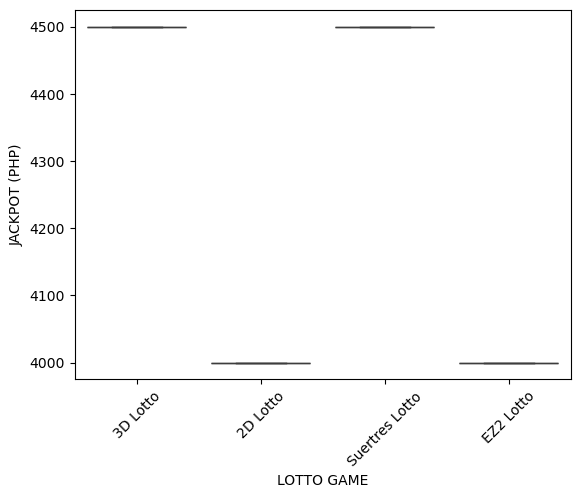

count     mean  std      min      25%      50%      75%  \
LOTTO GAME                                                                   
2D Lotto       10,989.00 4,000.00 0.00 4,000.00 4,000.00 4,000.00 4,000.00   
3D Lotto       10,994.00 4,500.00 0.00 4,500.00 4,500.00 4,500.00 4,500.00   
EZ2 Lotto           6.00 4,000.00 0.00 4,000.00 4,000.00 4,000.00 4,000.00   
Suertres Lotto      6.00 4,500.00 0.00 4,500.00 4,500.00 4,500.00 4,500.00   

                    max  
LOTTO GAME               
2D Lotto       4,000.00  
3D Lotto       4,500.00  
EZ2 Lotto      4,000.00  
Suertres Lotto 4,500.00

In [108]:
# box plot of Big Prize Games (Mega, Grand, Super, Ultra)
sns.boxplot(data=lotto_won_df[~lotto_won_df["LOTTO GAME"].isin(big_prize)], x="LOTTO GAME", y="JACKPOT (PHP)", hue='LOTTO GAME')
plt.xlabel("LOTTO GAME")
plt.xticks(rotation=45)
plt.show()

lotto_won_df[~lotto_won_df["LOTTO GAME"].isin(big_prize)].groupby('LOTTO GAME')['JACKPOT (PHP)'].describe()

# Most frequent numbers in winning combinations with actual winners (Grand Lotto 6/55)

Yearly line chart average of total prices
Most common number in each 

### Create subset

In [109]:
grand_lotto_df = lotto_df[lotto_df["LOTTO GAME"] == 'Grand Lotto 6/55']
grand_lotto_list = [int(str_num) for str_list in grand_lotto_df["COMBINATIONS"] for str_num in str_list]
print(grand_lotto_list)

[7, 45, 32, 42, 6, 28, 48, 45, 23, 30, 43, 17, 40, 17, 12, 29, 11, 48, 42, 30, 49, 6, 3, 45, 17, 25, 4, 11, 37, 52, 44, 8, 12, 29, 5, 39, 1, 53, 46, 52, 8, 18, 42, 13, 52, 4, 31, 12, 12, 13, 55, 2, 30, 14, 9, 35, 45, 52, 41, 38, 11, 32, 16, 9, 4, 24, 39, 31, 19, 24, 29, 12, 35, 49, 44, 53, 16, 31, 32, 53, 20, 8, 45, 54, 1, 2, 31, 13, 14, 44, 46, 54, 21, 51, 49, 42, 52, 13, 40, 27, 5, 11, 25, 35, 19, 12, 5, 45, 42, 55, 49, 29, 3, 36, 11, 29, 13, 48, 20, 9, 3, 54, 24, 36, 18, 46, 5, 3, 42, 27, 45, 34, 1, 7, 2, 11, 41, 37, 18, 8, 42, 3, 32, 24, 5, 8, 22, 6, 2, 45, 3, 45, 5, 18, 21, 28, 36, 32, 28, 14, 49, 45, 33, 55, 48, 19, 1, 50, 25, 32, 46, 44, 26, 36, 43, 17, 37, 9, 53, 4, 17, 19, 2, 6, 9, 42, 53, 26, 3, 22, 1, 6, 36, 12, 2, 26, 51, 29, 52, 33, 40, 48, 31, 6, 51, 49, 21, 17, 47, 54, 4, 19, 43, 25, 47, 26, 27, 21, 49, 2, 16, 7, 43, 24, 7, 29, 8, 27, 33, 51, 28, 23, 31, 20, 30, 29, 42, 28, 2, 43, 51, 21, 42, 4, 25, 17, 10, 26, 43, 45, 4, 30, 51, 9, 42, 28, 40, 31, 24, 52, 20, 34, 22, 43

In [110]:
# Most frequently occurring numbers
grand_lotto_series = pd.Series(grand_lotto_list)
list(grand_lotto_series.value_counts().head(10).reset_index()["index"])

[52, 6, 28, 54, 9, 20, 33, 49, 41, 43]

In [111]:
# Least frequently occurring numbers
list(grand_lotto_series.value_counts().tail(10).reset_index()["index"])

[25, 21, 39, 7, 36, 32, 18, 46, 31, 53]

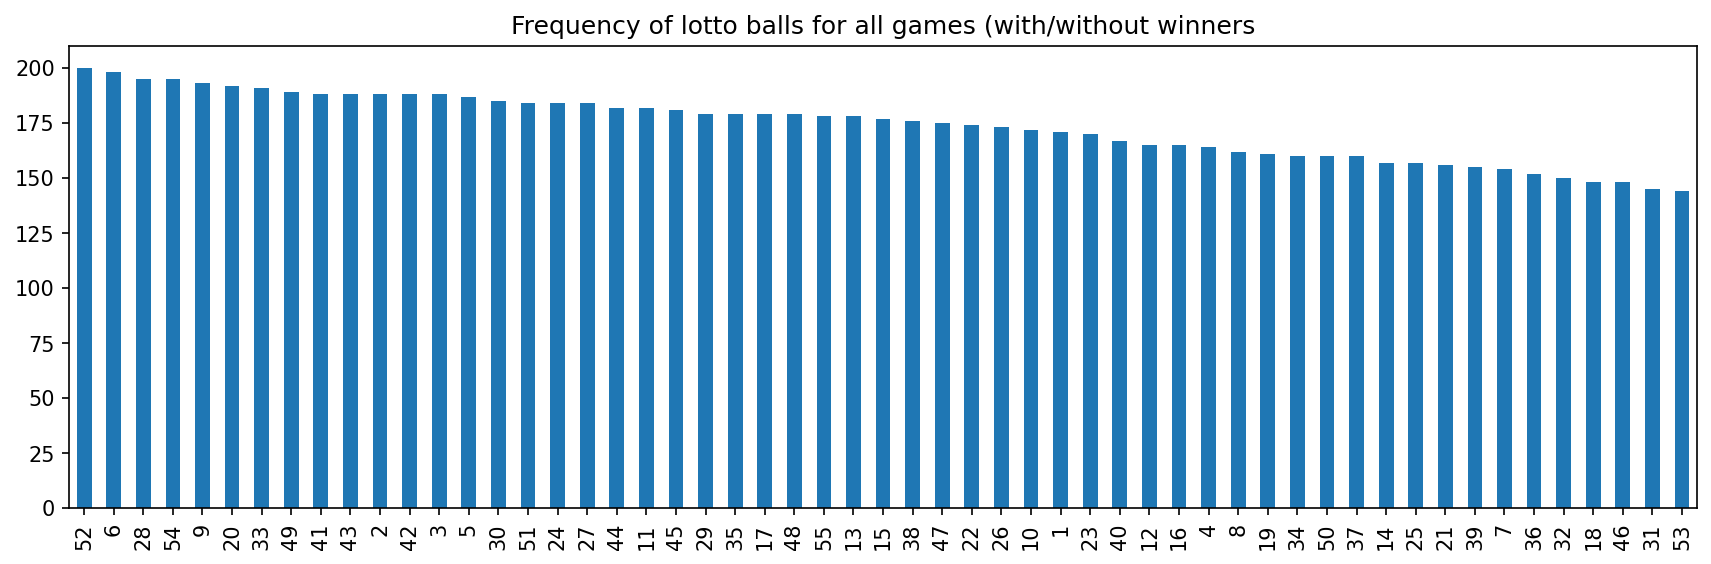

In [112]:
plt.figure(figsize=(14, 4), dpi=150)
plt.title("Frequency of lotto balls for all games (with/without winners")
grand_lotto_series.value_counts().plot(kind="bar")
plt.show()

In [113]:
grand_lotto_won_df = lotto_won_df[lotto_won_df["LOTTO GAME"] == 'Grand Lotto 6/55']
grand_lotto_won_list = [int(str_num) for str_list in grand_lotto_won_df["COMBINATIONS"] for str_num in str_list]
print(grand_lotto_won_list)

[3, 54, 24, 36, 18, 46, 30, 29, 42, 28, 2, 43, 13, 21, 24, 31, 9, 3, 45, 46, 33, 23, 3, 48, 21, 40, 15, 55, 10, 54, 27, 1, 16, 11, 50, 3, 31, 3, 17, 47, 24, 20, 8, 16, 25, 44, 6, 34, 17, 26, 30, 39, 14, 7, 24, 50, 52, 9, 51, 3, 52, 8, 41, 11, 27, 31, 30, 17, 6, 12, 4, 29, 55, 50, 6, 45, 12, 40, 19, 32, 25, 12, 17, 36, 5, 1, 27, 26, 44, 11, 11, 17, 28, 6, 9, 1, 28, 32, 12, 9, 18, 50, 4, 16, 26, 24, 14, 47, 26, 23, 34, 41, 45, 29, 45, 29, 12, 3, 26, 51, 9, 8, 5, 1, 30, 52, 3, 44, 10, 13, 23, 11, 44, 13, 19, 33, 27, 39, 40, 3, 34, 37, 19, 15, 44, 50, 7, 52, 46, 36, 9, 45, 36, 27, 18, 54, 2, 18, 49, 7, 19, 47, 9, 17, 45, 39, 35, 15, 39, 29, 9, 21, 19, 20, 29, 42, 12, 41, 1, 35, 7, 13, 5, 25, 28, 3, 13, 19, 43, 33, 41, 46, 13, 1, 50, 10, 51, 54, 38, 35, 11, 22, 39, 47, 18, 52, 17, 2, 54, 55, 2, 12, 22, 27, 3, 29, 25, 54, 4, 22, 55, 24, 45, 25, 50, 10, 15, 5, 32, 7, 10, 21, 20, 19, 2, 4, 6, 8, 24, 1, 17, 7, 38, 8, 5, 10, 34, 9, 28, 24, 19, 42, 1, 26, 47, 42, 19, 17, 9, 18, 10, 2, 12, 24, 2, 

In [114]:
# Most frequently occurring numbers
grand_lotto_won_series = pd.Series(grand_lotto_won_list)
list(grand_lotto_won_series.value_counts().head(10).reset_index()["index"])

[19, 9, 3, 12, 24, 17, 10, 25, 8, 27]

In [115]:
# Least frequently occurring numbers
list(grand_lotto_series.value_counts().tail(10).reset_index()["index"])

[25, 21, 39, 7, 36, 32, 18, 46, 31, 53]

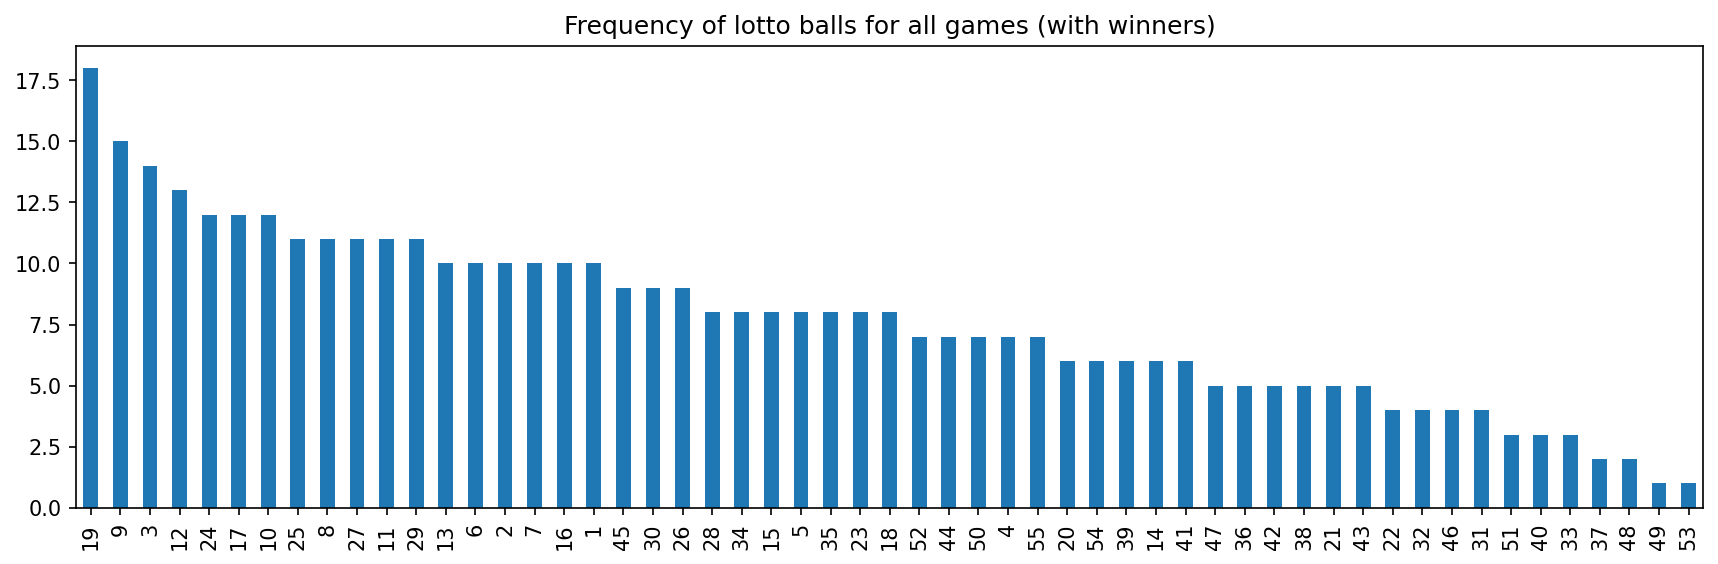

In [116]:
plt.figure(figsize=(14, 4), dpi=150)
plt.title("Frequency of lotto balls for all games (with winners)")
grand_lotto_won_series.value_counts().plot(kind="bar")
plt.show()

In [117]:
# Get common numbers (ALL winning balls & Winning balls with winners)

all_frequent_numbers = set(list(grand_lotto_series.value_counts().head(6).reset_index()["index"]))
all_infrequent_numbers = set(list(grand_lotto_series.value_counts().tail(6).reset_index()["index"]))

win_frequent_numbers = set(list(grand_lotto_won_series.value_counts().head(6).reset_index()["index"]))
win_infrequent_numbers = set(list(grand_lotto_won_series.value_counts().tail(6).reset_index()["index"]))

overlapping_frequent_numbers = all_frequent_numbers & win_frequent_numbers
overlapping_infrequent_numbers = all_infrequent_numbers & win_infrequent_numbers

print(overlapping_frequent_numbers)
print(overlapping_infrequent_numbers)

{9}
{53}
